In [1]:
using Revise

using RigidBodyDynamics
using RigidBodyDynamics: Bounds

using DrakeVisualizer
using Plots
using RigidBodyTreeInspector

using BilevelTrajOpt
gr(size=(500,500), html_output_format=:png);

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9dd84cf97c4fc16956f39829c81f3b6907c8fc83-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9dd84cf97c4fc16956f39829c81f3b6907c8fc83-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)
body = findbody(mechanism, "ball")
basejoint = joint_to_parent(body, mechanism)
floatingjoint = Joint(basejoint.name, frame_before(basejoint), frame_after(basejoint), QuaternionFloating{Float64}())
replace_joint!(mechanism, basejoint, floatingjoint)
position_bounds(floatingjoint) .= Bounds(-100, 100)
velocity_bounds(floatingjoint) .= Bounds(-100, 100)
μ = 0.5
motion_type = :xyz
point = Point3D(default_frame(findbody(mechanism, "floor")), [0.,0.,0.])
normal = FreeVector3D(default_frame(findbody(mechanism, "floor")), [0.,0.,1.])
hs = HalfSpace(point, normal)
floor = Obstacle(hs, μ, motion_type)
obstacles = [floor]
env = parse_contacts(mechanism, urdf, obstacles)
x0 = MechanismState(mechanism)
Δt = 0.005;

In [42]:
# q0 = [1., 0., 0., 0., 0., 0., 0.005]
q0 = [1., 0., 0., 0., 0., 0., 0.00]
v0 = [0., 0., 0., 0.5, 0. , 0.]
N = 10

set_configuration!(x0, q0)
set_velocity!(x0, v0)
setdirty!(x0)

ctrl! = (u,t,x) -> u[:] = 0.

(::#45) (generic function with 1 method)

In [ ]:
println("Implicit Contacts")
traj_imp = BilevelTrajOpt.simulate(x0,env,Δt,N,ctrl!,implicit_contact=true);

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  3.8067     
 -2.14927e-10
 -7.90663    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  3.8067     
 -2.14927e-10
 -7.90663    

Implicit Contacts


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  3.8067     
 -2.14927e-10
 -7.90663    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  3.8067     
 -2.14927e-10
 -7.90663    

elapsed time: 0.833271685 seconds


6-element Array{Float64,1}:
 -2.01948e-28
  0.0        
  0.0        
  4.32097    
 -4.15768e-11
 -8.64685    

6-element Array{Float64,1}:
 -2.01948e-28
  0.0        
  0.0        
  4.32097    
 -4.15768e-11
 -8.64685    

elapsed time: 1.231183934 seconds


6-element Array{Float64,1}:
   0.0        
   0.0        
  -5.04871e-29
   6.84703    
  -1.80842e-10
 -13.6929     

6-element Array{Float64,1}:
   0.0        
   0.0        
  -5.04871e-29
   6.84703    
  -1.80842e-10
 -13.6929     

elapsed time: 0.923999065 seconds


6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.92462    
 -3.46812e-11
 -9.84911    

6-element Array{Float64,1}:
  0.0        
  0.0        
  0.0        
  4.92462    
 -3.46812e-11
 -9.84911    

elapsed time: 1.460397352 seconds


6-element Array{Float64,1}:
 -1.57772e-30
  0.0        
 -6.46235e-27
  7.20306e-8 
 -1.23589e-8 
 -4.7208e-5  

In [35]:
println("Explicit Contacts")
traj_exp = BilevelTrajOpt.simulate(x0,env,Δt,N,ctrl!,implicit_contact=false);

Explicit Contacts
elapsed time: 0.004804581 seconds
elapsed time: 0.005540747 seconds
elapsed time: 0.005288238 seconds
elapsed time: 0.004937061 seconds
elapsed time: 0.004764656 seconds
elapsed time: 0.004677991 seconds
elapsed time: 0.004439008 seconds
elapsed time: 0.004351963 seconds
elapsed time: 0.004566529 seconds
elapsed time: 0.005125158 seconds
elapsed time: 0.00458278 seconds
elapsed time: 0.004618156 seconds
elapsed time: 0.004633707 seconds
elapsed time: 0.004607698 seconds
elapsed time: 0.005501973 seconds
elapsed time: 0.005551217 seconds
elapsed time: 0.005082147 seconds
elapsed time: 0.004599782 seconds
elapsed time: 0.004452533 seconds
elapsed time: 0.004362833 seconds
elapsed time: 0.004372761 seconds
elapsed time: 0.004575196 seconds
elapsed time: 0.004518889 seconds
elapsed time: 0.004335661 seconds
elapsed time: 0.004361351 seconds
elapsed time: 0.005540807 seconds
elapsed time: 0.005313987 seconds
elapsed time: 0.004958493 seconds
elapsed time: 0.004850016 secon

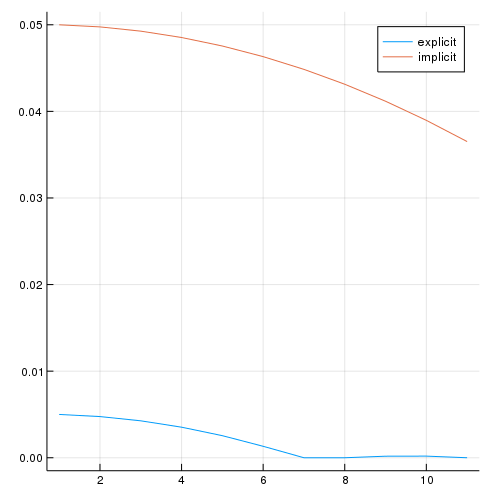

In [36]:
ts = cumsum([Δt for i in 1:N]);
j = 7
plot(traj_exp[j,:],label="explicit")
plot!(traj_imp[j,:],label="implicit")

In [ ]:
traj_imp

In [ ]:
maximum(traj_exp)